# Tanzania Precipitation Climatology

## Visualising Climate Data Anomalies with Xarray 

> Xarray is a python package that easily manipulates netCDF files, the file format for this demonstration in climatology visualisation.
> NetCDF is a self describable multidimensional file format freqeuntly used for climate and meteorological products.
> The data source is CRU TS, which is "is a widely used climate dataset on a 0.5° latitude by 0.5° longitude grid over all land domains of the world except Antarctica". "It is derived by the interpolation of monthly climate anomalies from extensive networks of weather station observations."

> Tanzania is a East African country that increasily suffers from severe to extreme drought conditions 
that impact on people and livelihoods negatively. This notebook is created with open source tools, with the aim to contribute to our understanding of the phenomena while higlighting the continent's ability to take advantage of reproducible science.



In [ ]:
### Import required libraries.

In [1]:
# Data downloded from https://crudata.uea.ac.uk/cru/data/hrg/ in 10 years file chunks
# Import the following libraries
# netCDF4 needs to be installed in your environment for this to work
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading single or multiples NetCDF

In [2]:
# Connect single data file to open
fp = "/Users/Narteh/gds/netcdf/data/cru_ts4.05.2001.2010.pre.dat.nc"

In [3]:
# Open dataset to read 
ds = xr.open_dataset(fp, engine="netcdf4")

In [4]:
# Check info on dataset
ds

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 120)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 2001-01-16 2001-02-15 ... 2010-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [5]:
# Find and add all data files in directory
glob.glob('/Users/Narteh/gds/netcdf/data/cru_ts4.05.*.nc')

['/Users/Narteh/gds/netcdf/data\\cru_ts4.05.1901.1910.pre.dat.nc',
 '/Users/Narteh/gds/netcdf/data\\cru_ts4.05.1911.1920.pre.dat.nc',
 '/Users/Narteh/gds/netcdf/data\\cru_ts4.05.1921.1930.pre.dat.nc',
 '/Users/Narteh/gds/netcdf/data\\cru_ts4.05.1931.1940.pre.dat.nc',
 '/Users/Narteh/gds/netcdf/data\\cru_ts4.05.1941.1950.pre.dat.nc',
 '/Users/Narteh/gds/netcdf/data\\cru_ts4.05.1951.1960.pre.dat.nc',
 '/Users/Narteh/gds/netcdf/data\\cru_ts4.05.1961.1970.pre.dat.nc',
 '/Users/Narteh/gds/netcdf/data\\cru_ts4.05.1971.1980.pre.dat.nc',
 '/Users/Narteh/gds/netcdf/data\\cru_ts4.05.1981.1990.pre.dat.nc',
 '/Users/Narteh/gds/netcdf/data\\cru_ts4.05.1991.2000.pre.dat.nc',
 '/Users/Narteh/gds/netcdf/data\\cru_ts4.05.2001.2010.pre.dat.nc',
 '/Users/Narteh/gds/netcdf/data\\cru_ts4.05.2011.2020.pre.dat.nc']

In [6]:
# Merge all dataset in directory and open 
ds = xr.open_mfdataset('/Users/Narteh/gds/netcdf/data/cru_ts4.05.*.nc', combine='by_coords') 

In [7]:
# Check concatenation
ds

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 1440)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 dask.array<chunksize=(120, 360, 720), meta=np.ndarray>
    stn      (time, lat, lon) float64 dask.array<chunksize=(120, 360, 720), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [8]:
# Extract the precipitation variable 'pre'
ds["pre"]

<xarray.DataArray 'pre' (time: 1440, lat: 360, lon: 720)>
dask.array<concatenate, shape=(1440, 360, 720), dtype=float32, chunksize=(120, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

### Check variable content

In [9]:
# The actual array data contents but does not show
ds["pre"].data

dask.array<concatenate, shape=(1440, 360, 720), dtype=float32, chunksize=(120, 360, 720), chunktype=numpy.ndarray>

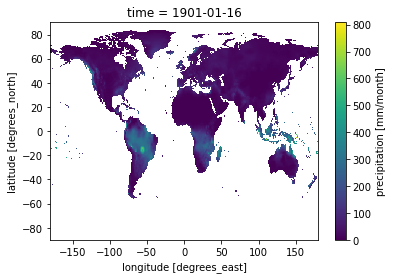

In [10]:
#  Check data to visualise precipitation variable, index selection
ds.pre.isel(time=0).plot()

### Slice Geographic Area

In [11]:
# Slice to subset geographic extent of Tanzania
ds_tanz = ds.pre.sel(lon=slice(28, 42), lat=slice(-12, 0))

In [12]:
ds_tanz

<xarray.DataArray 'pre' (time: 1440, lat: 24, lon: 28)>
dask.array<getitem, shape=(1440, 24, 28), dtype=float32, chunksize=(120, 24, 28), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 28.25 28.75 29.25 29.75 ... 40.25 40.75 41.25 41.75
  * lat      (lat) float32 -11.75 -11.25 -10.75 -10.25 ... -1.25 -0.75 -0.25
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

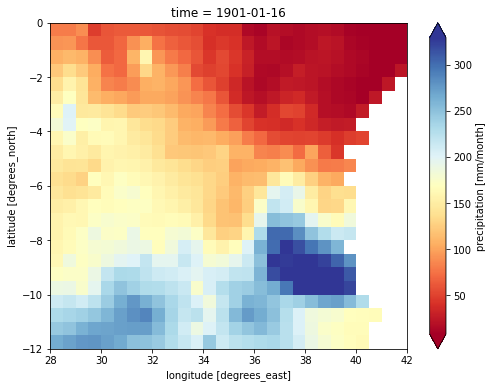

In [13]:
# Check visualisation of geographic region by index selection
ds_tanz.isel(time=0).plot(robust=True, figsize=(8, 6), cmap='RdYlBu');

### Climatology - Precipitation, Tanzania

In [14]:
# Mean on time by month on all dimensions
pre_clim = ds_tanz.groupby('time.month').mean()
pre_clim

<xarray.DataArray 'pre' (month: 12, lat: 24, lon: 28)>
dask.array<stack, shape=(12, 24, 28), dtype=float32, chunksize=(1, 24, 28), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 28.25 28.75 29.25 29.75 ... 40.25 40.75 41.25 41.75
  * lat      (lat) float32 -11.75 -11.25 -10.75 -10.25 ... -1.25 -0.75 -0.25
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

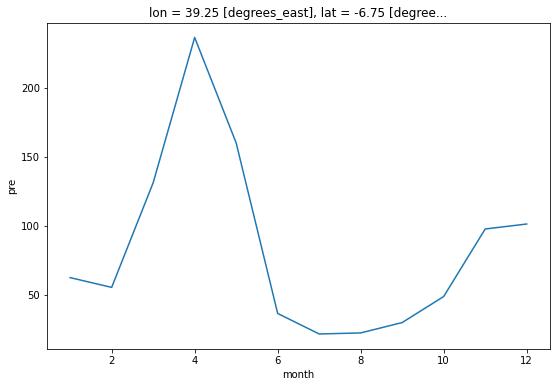

In [15]:
# Plot climatology at a specific point, Dar es Salaam
pre_clim.sel(lon=39, lat=-7, method="nearest").plot(size = 6);

In [16]:
# Subset based on WMO definition, 1st climatology standard normal period, 1901-1930
pre_clim1 =ds_tanz.sel(time = slice('1901-01', '1930-12'))
pre_clim1

<xarray.DataArray 'pre' (time: 360, lat: 24, lon: 28)>
dask.array<getitem, shape=(360, 24, 28), dtype=float32, chunksize=(120, 24, 28), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 28.25 28.75 29.25 29.75 ... 40.25 40.75 41.25 41.75
  * lat      (lat) float32 -11.75 -11.25 -10.75 -10.25 ... -1.25 -0.75 -0.25
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 1930-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [17]:
# Group 1st climatology period by time in month
clim1_mon = pre_clim1.groupby("time.month")

##### Climatology reference normal 1961- 1990

In [18]:
# Subset based on WMO, climatology reference normal, 1961-1990
# Select geographic area and time
clim_normal =ds.pre.sel(lon=slice(28, 42), lat=slice(-12, 0)).sel(time = slice("1961-01", "1990-12"))
clim_normal

<xarray.DataArray 'pre' (time: 360, lat: 24, lon: 28)>
dask.array<getitem, shape=(360, 24, 28), dtype=float32, chunksize=(120, 24, 28), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 28.25 28.75 29.25 29.75 ... 40.25 40.75 41.25 41.75
  * lat      (lat) float32 -11.75 -11.25 -10.75 -10.25 ... -1.25 -0.75 -0.25
  * time     (time) datetime64[ns] 1961-01-16 1961-02-15 ... 1990-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [19]:
# Mean climatology reference normal, 1961-1990
clim_normal_mean = clim_normal.groupby("time.month").mean(dim=['time', 'lat', 'lon'])
clim_normal_mean

<xarray.DataArray 'pre' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

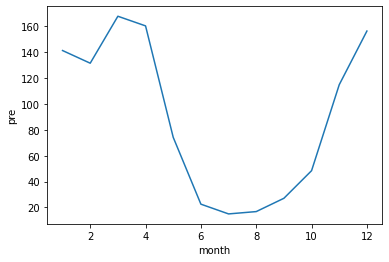

In [20]:
# Check mean monthly precipitation
clim_normal_mean.plot()

In [21]:
# Convert to dataframe to plot
clim_normal_df = clim_normal_mean.to_dataframe()
clim_normal_df

,pre
month,
1,141.382660
2,131.579712
3,167.908020
4,160.443726
5,74.243202
6,22.539408
7,14.993815
8,16.798447
9,27.086863


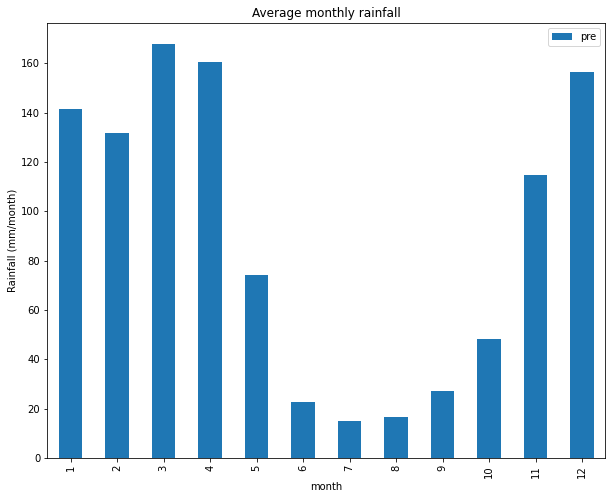

In [22]:
# Bar plot
clim_normal_df.plot.bar(figsize=(10, 8))
plt.title("Average monthly rainfall")
plt.ylabel("Rainfall (mm/month)");

##### Selection by label

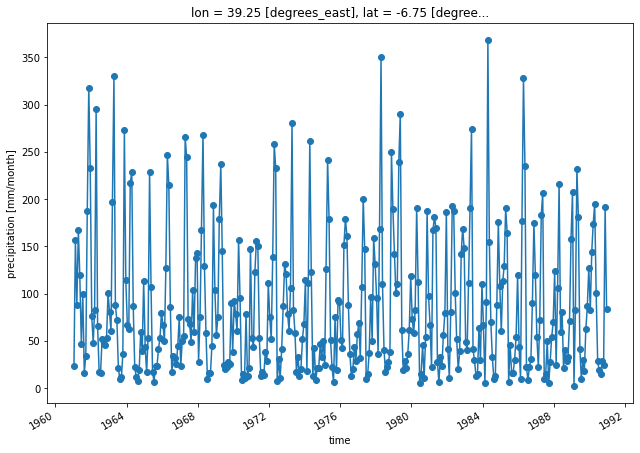

In [23]:
# Mean monthly precipitation of Dar es Salaam
clim_normal.sel(lat=-7, lon=39, method="nearest").plot(marker="o", size = 7)

##### Climate Anomalies, 1901 - 1930

In [24]:
clim1_anom =clim1_mon - clim_normal_mean
clim1_anom

<xarray.DataArray 'pre' (time: 360, lat: 24, lon: 28)>
dask.array<getitem, shape=(360, 24, 28), dtype=float32, chunksize=(1, 24, 28), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 28.25 28.75 29.25 29.75 ... 40.25 40.75 41.25 41.75
  * lat      (lat) float32 -11.75 -11.25 -10.75 -10.25 ... -1.25 -0.75 -0.25
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 1930-12-16
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

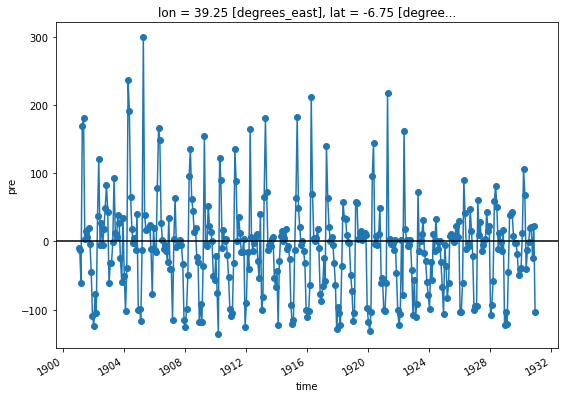

In [25]:
# Plot anomalies of Dar es Salaam
clim1_anom.sel(lon=39, lat=-7, method='nearest').plot(marker="o", size=6)
plt.axhline(0, color="k", linestyle="solid")
plt.savefig('/Users/Narteh/gds/netcdf/image/ano1_1901-30', dpi=300)

### Climatology, 1991 to 2020

In [26]:
# Subset based on WMO, 3rd climatology standard normal period, 1991-2020
clim3_norm =ds.pre.sel(lon=slice(28, 42), lat=slice(-12, 0)).sel(time = slice("1991-01", "2020-12"))
clim3_norm

<xarray.DataArray 'pre' (time: 360, lat: 24, lon: 28)>
dask.array<getitem, shape=(360, 24, 28), dtype=float32, chunksize=(120, 24, 28), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 28.25 28.75 29.25 29.75 ... 40.25 40.75 41.25 41.75
  * lat      (lat) float32 -11.75 -11.25 -10.75 -10.25 ... -1.25 -0.75 -0.25
  * time     (time) datetime64[ns] 1991-01-16 1991-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [27]:
# Group climatology by month
clim3_month = clim3_norm.groupby("time.month")

In [28]:
# Mean climatology across all dimensions 
monthly_mean = clim3_month.mean(dim=["time","lat","lon"])
monthly_mean

<xarray.DataArray 'pre' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [29]:
# Convert mean monthly climatology to dataframe
monthly_mean_df = monthly_mean.to_dataframe()
monthly_mean_df

,pre
month,
1,146.523911
2,126.121490
3,166.707214
4,140.117996
5,71.116402
6,21.643909
7,12.435397
8,15.628823
9,26.885075


In [30]:
# Create dictionary to obtain month by month name
monthly_mean_df = monthly_mean_df.rename(index = {1:  "Jan",2: "Feb",3: "Mar", 4: "Apr",5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sept",
                        10: "Oct", 11: "Nov", 12: "Dec"})

In [31]:
# Check
monthly_mean_df

,pre
month,
Jan,146.523911
Feb,126.121490
Mar,166.707214
Apr,140.117996
May,71.116402
Jun,21.643909
Jul,12.435397
Aug,15.628823
Sept,26.885075


#### Mean Monthly Rainfall, 1991 - 2020

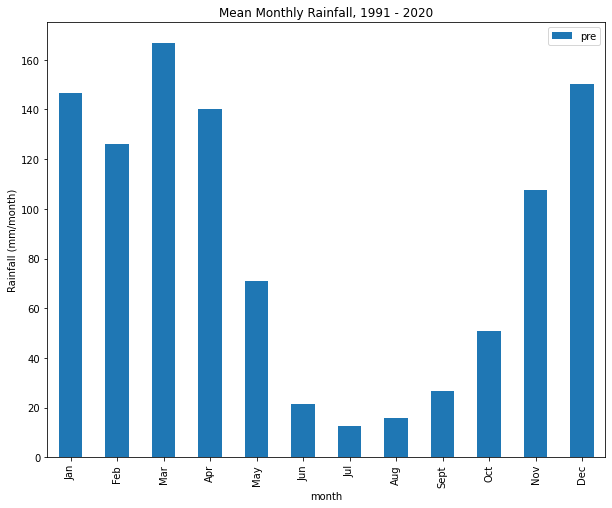

In [32]:
monthly_mean_df.plot.bar(figsize=(10,8))
plt.title("Mean Monthly Rainfall, 1991 - 2020")
plt.ylabel("Rainfall (mm/month)")
plt.savefig('/Users/Narteh/gds/netcdf/image/mm_pre_1991-2020', dpi=300);

In [33]:
# Climatology anomalies, 1991 - 2020
clim3_anom = clim3_month - clim_normal_mean
clim3_anom

<xarray.DataArray 'pre' (time: 360, lat: 24, lon: 28)>
dask.array<getitem, shape=(360, 24, 28), dtype=float32, chunksize=(1, 24, 28), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 28.25 28.75 29.25 29.75 ... 40.25 40.75 41.25 41.75
  * lat      (lat) float32 -11.75 -11.25 -10.75 -10.25 ... -1.25 -0.75 -0.25
  * time     (time) datetime64[ns] 1991-01-16 1991-02-15 ... 2020-12-16
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

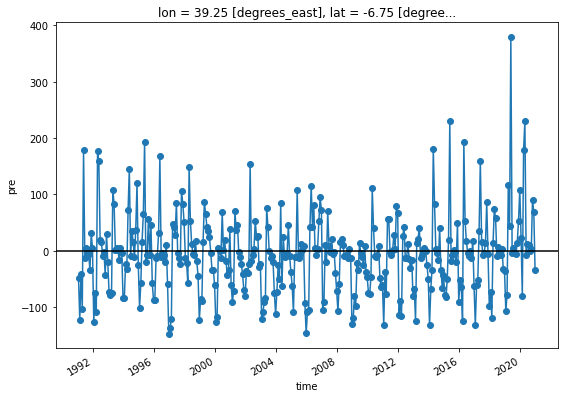

In [34]:
# Anomalies for last climatology 1990 - 2020, for Dar es Salaam
clim3_anom.sel(lat=-7, lon=39, method='nearest').plot(marker="o", size=6)
plt.axhline(0, color="k", linestyle="solid")
plt.savefig('/Users/Narteh/gds/netcdf/image/ano_1991-2020', dpi=300)

In [35]:
# Calculate anomalies for the last decade 2010 to 2020
decade = ds.pre.sel(lon=slice(28, 42), lat=slice(-12, 0)).sel(time = slice("2010-01", "2020-12"))
decade

<xarray.DataArray 'pre' (time: 132, lat: 24, lon: 28)>
dask.array<getitem, shape=(132, 24, 28), dtype=float32, chunksize=(120, 24, 28), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 28.25 28.75 29.25 29.75 ... 40.25 40.75 41.25 41.75
  * lat      (lat) float32 -11.75 -11.25 -10.75 -10.25 ... -1.25 -0.75 -0.25
  * time     (time) datetime64[ns] 2010-01-16 2010-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [36]:
# Group decadal period by month
dec_month = decade.groupby("time.month")
dec_month

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [37]:
# Decadal anomalies
dec_anom = dec_month - clim_normal_mean

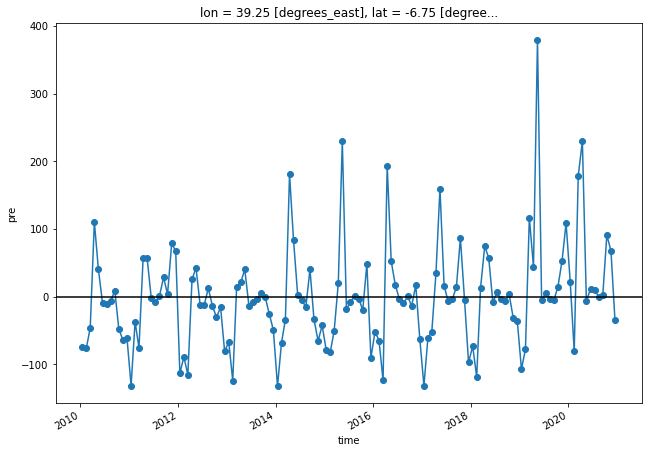

In [38]:
# Plot anomalies for the last deacde, 2010 - 2020 for Dar es Salaam
dec_anom.sel(lon=39, lat=-7, method='nearest').plot(marker="o", size=7)
plt.axhline(0, color="k", linestyle="solid")
plt.savefig('/Users/Narteh/gds/netcdf/image/dec_dar_2010-2020', dpi=300)

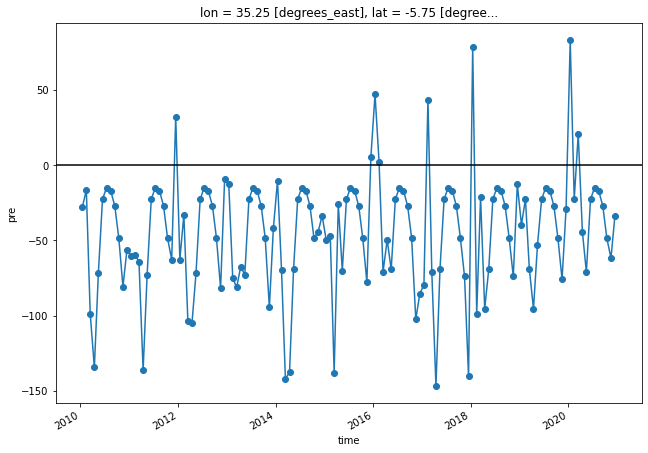

In [39]:
# Plot anomalies for the last deacde, 2010 - 2020 for Dodoma the second capital.
# Dodoma is considered to be among the driest places in Tanzania
dec_anom.sel(lon=35, lat=-6, method='nearest').plot(marker="o", size=7)
plt.axhline(0, color="k", linestyle="solid")
plt.savefig('/Users/Narteh/gds/netcdf/image/dec_doma_2010-2020', dpi=300)

### Spatial Distribution

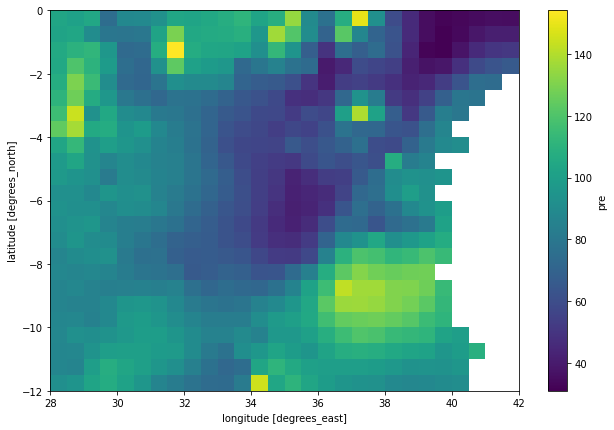

In [40]:
# Mean precipitation along time dimension 
pre_clim1.mean(dim='time').plot(size=7);

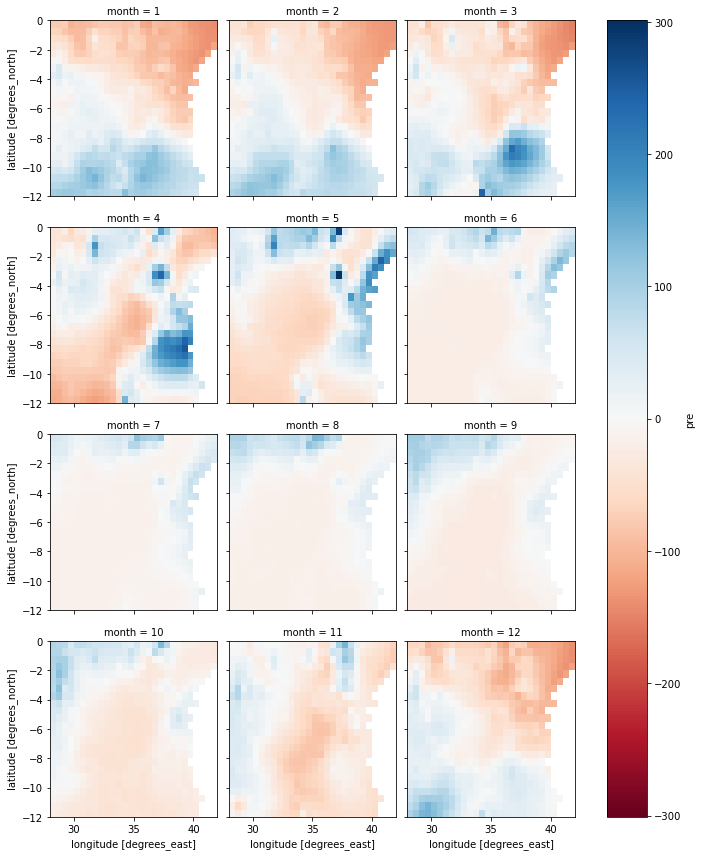

In [41]:
# Mean monthly rainfall anomalies distribution for the first climatology, 1901 - 1930
clim1_anom.sel(
    time=slice('1901-01', '1930-12')).groupby('time.month').mean(dim='time').plot(col='month', cmap='RdBu', col_wrap=3)
plt.savefig('/Users/Narteh/gds/netcdf/image/clim1_anom', dpi=300)

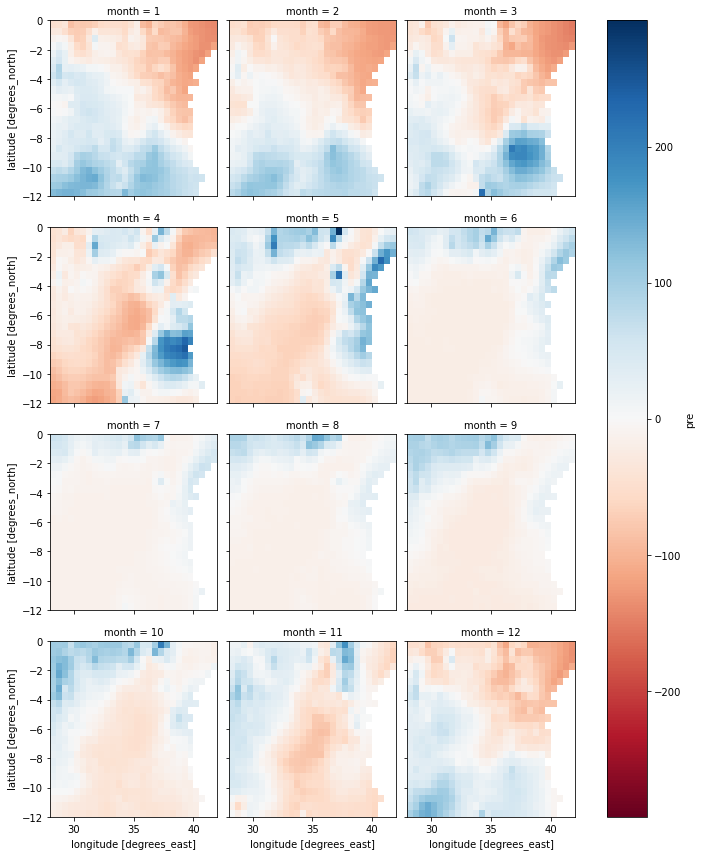

In [42]:
# Mean monthly rainfall anomalies distribution in the last climatology, 1991 - 2020
clim3_anom.sel(
    time=slice('1991-01', '2020-12')).groupby('time.month').mean(dim='time').plot(col='month', cmap='RdBu', col_wrap=3)
plt.savefig('/Users/Narteh/gds/netcdf/image/clim3_anom', dpi=300)

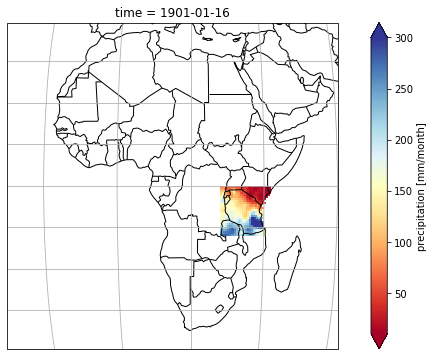

In [43]:
# Rainfall distribution for January 1901

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=20))
ax.coastlines()
ax.gridlines()
ds_tanz.isel(time=0).plot(
    ax=ax, transform=ccrs.PlateCarree(), vmin=10, vmax=300, cmap='RdYlBu'
)
ax.add_feature(cfeature.BORDERS)
ax.set_extent((-30, 60, 30, -30))
plt.savefig('/Users/Narteh/gds/netcdf/image/rain_1901', dpi=300)

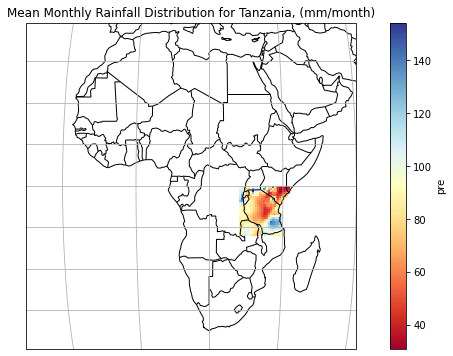

In [44]:
# Mean monthly rainfall distribution for Tanzania

pre_mean = pre_clim1.mean(dim='time')

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=20))
ax.coastlines()
ax.gridlines()
ax.add_feature(cfeature.BORDERS)
ax.set_extent((-30, 60, 30, -30))

pre_mean.plot(
    ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu'
)
ax.title.set_text('Mean Monthly Rainfall Distribution for Tanzania, (mm/month)')
plt.savefig('/Users/Narteh/gds/netcdf/image/clim1_mean', dpi=300)